In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [183]:
# normalizing a vector to a unit vector
def Vnorm(V):
    v_i = V[0]
    v_j = V[1]
    v_k = V[2]
    
    norm = torch.sqrt(v_i**2+v_j**2+v_k**2)
    return torch.Tensor([[V[0]/norm, V[1]/norm, V[2]/norm]]).t()

#vector norm
def L2Norm(S):
    return torch.sqrt(S[0]**2+S[1]**2+S[2]**2)


In [13]:
def plot_orbit_3d(S):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.plot(S_out[:,0],S_out[:,1],S_out[:,2])
    

In [208]:
# Equations of motion
def propogate(position_vector, velocity_vector, timestep):
    GM = 3.986004418e14
    g = GM/L2Norm(position_vector)**2
    s_hat = Vnorm(position_vector)
    d_vel = torch.mul(-s_hat,g)
    
    return velocity_vector, d_vel

In [209]:
#RK4 implementation
def RK4(function, pos_vec, vel_vec, timestep):
    f1_pos, f1_vel = function(pos_vec, vel_vec, timestep)
    f2_pos, f2_vel = function(pos_vec+timestep*f1_pos/2, vel_vec+timestep*f1_vel/2,timestep)
    f3_pos, f3_vel = function(pos_vec+timestep*f2_pos/2, vel_vec+timestep*f2_vel/2, timestep)
    f4_pos, f4_vel = function(pos_vec+timestep*f3_pos,vel_vec+timestep*f3_vel, timestep)
    new_pos = pos_vec + timestep/6 * (f1_pos + 2*f2_pos + 2*f3_pos+f4_pos)
    new_vel = vel_vec + timestep/6 * (f1_vel + 2*f2_vel + 2*f3_vel+f4_vel)
    return new_pos, new_vel

In [210]:
#plot position and velocity vectors
def plot_vector(position_vector, velocity_vector):
    origin = [0,0,0]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.quiver(origin[0],origin[0],origin[0],position_vector[0],position_vector[1],position_vector[2])
    plt.quiver(position_vector[0],position_vector[1],position_vector[2],velocity_vector[0],velocity_vector[1],velocity_vector[2])
    ax.set_aspect('equal')
    plt.show()

In [221]:
radius_earth = 6.3781e6
altitude = 300e3
initial_vel = 8.8e3
time_step = 60 # every minute

S = torch.Tensor([[radius_earth+altitude,0,0]]).t() # initial orbital altitude
V = torch.Tensor([[0,initial_vel,0]]).t() # initial orbital velocity
#S = torch.Tensor([[10,0,0]]).t() # initial orbital altitude
#V = torch.Tensor([[0,5,0]]).t() # initial orbital velocity
S_out = torch.Tensor()

for t in range(90):
    S, V = RK4(propogate,S,V,time_step)
    S_out = torch.cat((S_out,S.t()))
    
    #check for collision
    norm = L2Norm(S)
    if norm < radius_earth:
        break;
    

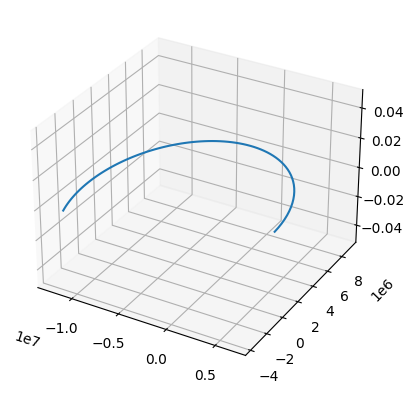

In [222]:
plot_orbit_3d(S_out)

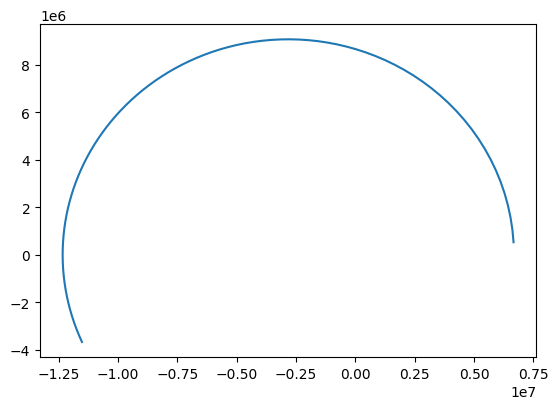

In [223]:
plt.plot(S_out[:,0],S_out[:,1])
ax = plt.gca().set_aspect('equal')